In [107]:
import time


In [108]:
import katdal
import numpy as np
import pickle

In [109]:
np.set_printoptions(precision=1,suppress=True)

In [110]:
def target(h):
    h.catalogue.remove('Nothing')
    if len(h.catalogue) >0 :
        tgt=str(h.catalogue.targets[0])[0:12]
    else:
        tgt="Nothing:Bad DATA"
    return tgt

In [111]:
def get_ants(h):
    a_list=[]
    aa=h.file['TelescopeState']['cal_antlist']
    for i,ai in enumerate(aa):
        a_list.append(pickle.loads(ai[1]))
    a_array=np.array(a_list)
    labels=a_array[0]
    return labels

In [112]:
def phases(h):
    g = h.file['TelescopeState']['cal_product_G']
    g_list = []
    for i, gi in enumerate(g):
        g_list.append(pickle.loads(gi[1]))
    g_array = np.array(g_list)
    HH=g_array[:,0,:]
    VV=g_array[:,1,:]
    HHbefore=np.rad2deg(np.angle(HH)[0])
    HHafter=np.rad2deg(np.angle(HH)[-1])
    VVbefore=np.rad2deg(np.angle(VV)[0])
    VVafter=np.rad2deg(np.angle(VV)[-1])
    return HHbefore, HHafter,VVbefore,VVafter

In [113]:
def get_ut(f):
    nn=int(f[-13:-3])
    print nn
    ut=time.asctime(time.gmtime(nn))
    return ut

In [114]:
files=['/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/11/29/1480415896.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/11/29/1480416496.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/11/29/1480422817.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/11/29/1480423325.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/11/29/1480423665.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/11/29/1480459808.h5']

In [115]:
for f in files:
    h=katdal.open(f)
    p=phases(h)
    print get_ut(f), f[-13:-3], target(h)
    print get_ants(h)
    print p[0],"\n",p[1],"\n\n",p[2],"\n",p[3]
    

1480415896
Tue Nov 29 10:38:16 2016 1480415896 PKS 1934-63 
['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm031' 'm063']
[ -0.   21.1  67.2   8.1  90.7  25.1 -50.8  37.4] 
[ -0.   21.9  67.5  10.   91.7  25.8 -50.2  38.8] 

[  0.   54.4  61.8  40.1  41.2  13.1  15.1  57.3] 
[  0.   55.2  61.9  42.1  42.1  13.8  15.6  58.5]
1480416496
Tue Nov 29 10:48:16 2016 1480416496 PKS 1934-63 
['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm031' 'm063']
[ -0.   21.1  67.2   8.1  90.7  25.1 -50.8  37.4] 
[  0.   20.6  57.4   3.3  68.9  10.4 -64.2  38.2] 

[  0.   54.4  61.8  40.1  41.2  13.1  15.1  57.3] 
[  0.   50.4  57.6  33.2  27.6   9.5  -0.7  58.1]
1480422817
Tue Nov 29 12:33:37 2016 1480422817 PKS 1934-63 
['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm031' 'm063']
[ -0.   21.1  67.2   8.1  90.7  25.1 -50.8  37.4] 
[  0.   16.8  62.9   1.   81.6  15.3 -48.4  35.3] 

[  0.   54.4  61.8  40.1  41.2  13.1  15.1  57.3] 
[  0.   55.5  64.2  40.1  41.7  26.8  21.3  73.5]
1480423325
Tue Nov 29 12:42:05 201

In [116]:
vphases=np.empty([8])
hphases=np.empty([8])
tstamp=[]

In [118]:
for f in files:
    h=katdal.open(f)
    p=phases(h)
    print get_ut(f), f[-13:-3], target(h)
    tstamp.append(int(f[-13:-3]))
    ants=get_ants(h)
    hphases=np.vstack((hphases,p[1]))
    vphases=np.vstack((vphases,p[3]))
    

1480415896
Tue Nov 29 10:38:16 2016 1480415896 PKS 1934-63 
1480416496
Tue Nov 29 10:48:16 2016 1480416496 PKS 1934-63 
1480422817
Tue Nov 29 12:33:37 2016 1480422817 PKS 1934-63 
1480423325
Tue Nov 29 12:42:05 2016 1480423325 PKS 1934-63 
1480423665
Tue Nov 29 12:47:45 2016 1480423665 PKS 1934-63 
1480459808
Tue Nov 29 22:50:08 2016 1480459808 PKS 0408-65 


In [122]:
import matplotlib.pylab as plt
%matplotlib inline

In [123]:
#v=vphases.reshape(7,8)

print hphases[1:]
print vphases[1:]


[[  -0.    21.9   67.5   10.    91.7   25.8  -50.2   38.8]
 [   0.    20.6   57.4    3.3   68.9   10.4  -64.2   38.2]
 [   0.    16.8   62.9    1.    81.6   15.3  -48.4   35.3]
 [  -0.    17.3   73.2    8.7   97.1   18.8  -60.9   38.8]
 [  -0.    12.8   72.6    0.9   86.4   19.2  -68.    41.7]
 [  -0.    -0.5   76.6   37.1  103.9   21.3  -72.7   -0.3]]
[[  0.   55.2  61.9  42.1  42.1  13.8  15.6  58.5]
 [  0.   50.4  57.6  33.2  27.6   9.5  -0.7  58.1]
 [  0.   55.5  64.2  40.1  41.7  26.8  21.3  73.5]
 [  0.   53.4  68.3  33.7  51.7  14.2   3.4  64.3]
 [  0.   53.9  73.1  33.2  46.8  17.6   0.1  69.1]
 [  0.   40.6  79.7  79.8  71.   24.1   8.   54. ]]


In [124]:
hp=np.delete(hphases,0,0)
vp=np.delete(vphases,0,0)
print hp
print vp

[[  -0.    21.9   67.5   10.    91.7   25.8  -50.2   38.8]
 [   0.    20.6   57.4    3.3   68.9   10.4  -64.2   38.2]
 [   0.    16.8   62.9    1.    81.6   15.3  -48.4   35.3]
 [  -0.    17.3   73.2    8.7   97.1   18.8  -60.9   38.8]
 [  -0.    12.8   72.6    0.9   86.4   19.2  -68.    41.7]
 [  -0.    -0.5   76.6   37.1  103.9   21.3  -72.7   -0.3]]
[[  0.   55.2  61.9  42.1  42.1  13.8  15.6  58.5]
 [  0.   50.4  57.6  33.2  27.6   9.5  -0.7  58.1]
 [  0.   55.5  64.2  40.1  41.7  26.8  21.3  73.5]
 [  0.   53.4  68.3  33.7  51.7  14.2   3.4  64.3]
 [  0.   53.9  73.1  33.2  46.8  17.6   0.1  69.1]
 [  0.   40.6  79.7  79.8  71.   24.1   8.   54. ]]


In [ ]:
times=np.array(tstamp)

In [125]:
colors=['b','g','r','c','m','k','lime','teal','purple','saddlebrown','grey']

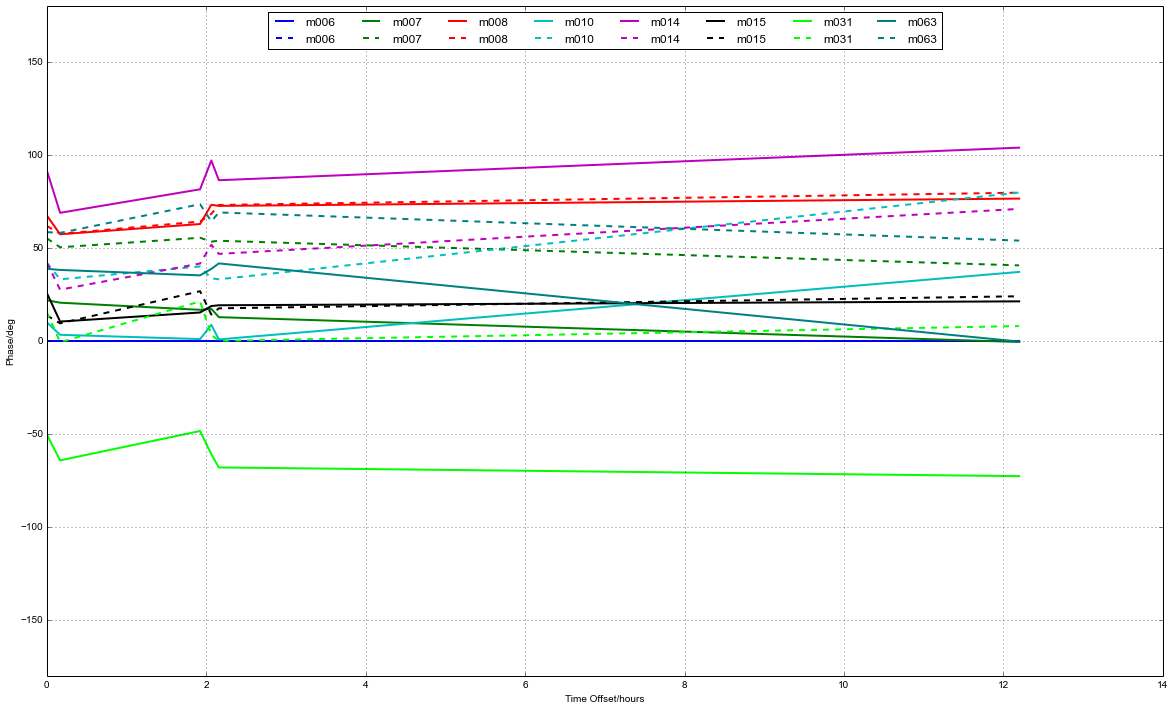

In [152]:
plt.figure(figsize=(20,12))
nants=len(ants)
plt.ylim([-180,180])

for i in range(nants):
    plt.plot((times-times[0])/3600., hp[:,i], label=ants[i],color=colors[i],linewidth=2)
    plt.plot((times-times[0])/3600., vp[:,i], linestyle='--', label=ants[i],color=colors[i],linewidth=2)
plt.ylabel("Phase/deg")
plt.xlabel("Time Offset/hours")
plt.legend(loc='upper center',ncol=nants)
plt.grid()

In [151]:
times=np.array(tstamp)
print (times-times[0])/3600.

[  0.    0.2   1.9   2.1   2.2  12.2]
